In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import yfinance as yf

global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
df_bitcoin = []
precio_actual = []
tendencia = []
media_bitcoin = []
algortimo_decision = []

#**2. Obtención de Datos**

## 2.1 Precios Historicos del Bitcoin
Importar los datos del precio historico del Bitcoin usando Yahoo Finance

In [2]:
def importar_base_bitcoin():
  global df_bitcoin
  #Descargamos los datos historicos del Bitcoin y lo guardamos en una variable
  df_bitcoin = yf.download("BTC-USD", period="7d", interval='5m')


In [3]:
importar_base_bitcoin()
df_bitcoin.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-29 20:25:00+00:00,63037.902344,63037.902344,63017.437500,63017.437500,63017.437500,12058624
2024-04-29 20:30:00+00:00,62998.906250,63031.222656,62996.464844,63031.222656,63031.222656,8841216
2024-04-29 20:35:00+00:00,63020.035156,63042.472656,63020.035156,63042.472656,63042.472656,2297856
2024-04-29 20:40:00+00:00,62981.988281,62981.988281,62951.972656,62976.726562,62976.726562,18982912
2024-04-29 20:45:00+00:00,63002.218750,63002.218750,62955.656250,62955.656250,62955.656250,0


##2.2 Web Scraping

### Método largo con 2 páginas diferentes

In [4]:
#def extraer_tendencias():
#  global precio_actual, tendencia, media_bitcoin
#  url_precio = 'https://coinmarketcap.com/currencies/bitcoin/'
#  respuesta = requests.get(url_precio)
#  s = BeautifulSoup(respuesta.content, "lxml")

#  prec= s.find('span',{'class': 'sc-f70bb44c-0 jxpCgO base-text'})
#  precio_actual = []
#  precio_actual = (float(prec.text.strip().replace("$","").replace(",","")))

#  url_tendencia = 'https://coinmarketcap.com/'
#  response = requests.get(url_tendencia)
#  c = BeautifulSoup(response.content, 'lxml')

#  tend = c.findAll('td', {'style':'text-align:end'})
#  tendencia = []
#  if 'icon-Caret-up' in str(tend[1]):
#    tendencia = 'alta'
#  else:
#    tendencia = 'baja'

### Método corto con solo 1 página, la misma páigna en ambas variables

In [5]:
def extraer_tendencias():
  global precio_actual, tendencia
  url_general= 'https://coinmarketcap.com/'
  respuesta = requests.get(url_general)
  s = BeautifulSoup(respuesta.content, "lxml")

  prec= s.find('td', {'style':'text-align:end'})
  precio_actual = (float(prec.text.strip().replace("$","").replace(",","")))

  tend = s.findAll('td', {'style':'text-align:end'})
  if 'icon-Caret-up' in str(tend[1]):
    tendencia = 'alta'
  else:
    tendencia = 'baja'

In [6]:
extraer_tendencias()
print(f'El precio_actual de Bitcoin es: ${precio_actual}')
print(f'Su tendencia de 1H es: {tendencia}')


El precio_actual de Bitcoin es: $60367.85
Su tendencia de 1H es: baja


In [7]:
# @title Para revisar como conectar a la web para scraping
url_pract = 'https://coinmarketcap.com/'
response = requests.get(url_pract)
c = BeautifulSoup(response.content, 'lxml')
tendenci = []

tend = c.findAll('td', {'style':'text-align:end'})
varia = str(tend[1])
if 'icon-Caret-up' in varia:
  print('exitoso')
else:
  print('bajista')

varia

bajista


'<td style="text-align:end"><span class="sc-6a54057-0 iEhQde"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.50%</span></td>'

In [8]:
# @title Practicando los resultados del scraping, ver los formatos de result
url_practi2 = 'https://coinmarketcap.com/'
response = requests.get(url_practi2)
d = BeautifulSoup(response.content, 'lxml')
tendenci = []


#if elementos[3].next.attrs['class'][0] == "icon-Caret-up":
tend = d.findAll('td', {'style':'text-align:end'})
print(tend[1])
print(tend[1].next)
print(tend[1].next.attrs)
print(tend[1].next.attrs['class'][0])
print(tend[1].attrs)
print(tend[1].next.next)
print(tend[1].next.next.attrs)
print(tend[1].next.next.attrs['class'][0])

if tend[1].next.next.attrs['class'][0] == 'icon-Caret-up':
  print('Dormir, el precio está alcista')
else: print('El precio está bajista')

<td style="text-align:end"><span class="sc-6a54057-0 iEhQde"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.50%</span></td>
<span class="sc-6a54057-0 iEhQde"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.50%</span>
{'class': ['sc-6a54057-0', 'iEhQde']}
sc-6a54057-0
{'style': 'text-align:end'}
<span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>
{'class': ['icon-Caret-down'], 'style': 'width:12px;height:18px;display:inline-block'}
icon-Caret-down
El precio está bajista


#**3. Limpieza de datos**

In [9]:
def limpieza_datos():
  global df_bitcoin, media_bitcoin
  df_bitcoin_limpio = df_bitcoin.copy()

  ## Dos formas de eliminar los índices duplicados:
  #df_bitcoin_limpio = df_bitcoin_limpio.reset_index().drop_duplicates(subset='Datetime', keep='last').set_index('Datetime').sort_index()
  df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]

  ##para tratar los null en la columna Close:
  df_bitcoin_limpio['Close'] = df_bitcoin_limpio['Close'].interpolate()

  ## drop volume == 0
  df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Volume'] > 0)]

  ## utilizamos solamente los precios que cerraron dentro del rango del primer y tercer cuartil
  upper_quartile = np.percentile(df_bitcoin_limpio['Close'], 75)
  lower_quartile = np.percentile(df_bitcoin_limpio['Close'], 25)
  df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= lower_quartile) & (df_bitcoin_limpio['Close'] <= upper_quartile)]

  # Finalmente tenemos:
  media_bitcoin = round(df_bitcoin_limpio['Close'].mean(),2)

primer quartil: 63016.70703125
primer quartil: 64365.103515625


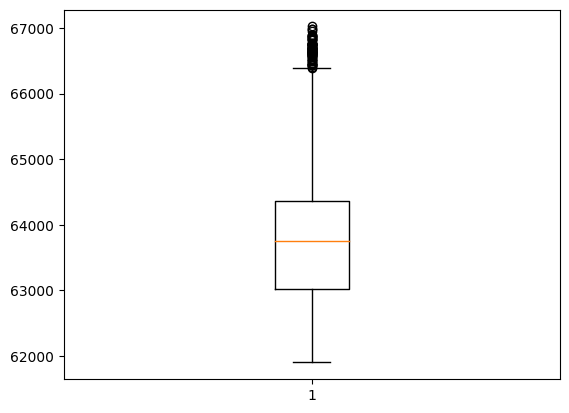

In [10]:
# @title Grafico Boxplot del precio (close) de Bitcoin
df_bitcoin_volu = df_bitcoin[(df_bitcoin['Volume'] > 0)]
upper_quartile = np.percentile(df_bitcoin_volu['Close'], 75)
lower_quartile = np.percentile(df_bitcoin_volu['Close'], 25)
print(f'primer quartil: {lower_quartile}')
print(f'primer quartil: {upper_quartile}')
plt.boxplot(df_bitcoin_volu['Close']);

In [11]:
limpieza_datos()
print(f'Promedio del precio de Bitcoin: {media_bitcoin}')

Promedio del precio de Bitcoin: 63718.69


#**4. Tomar decisiones**
funcion tomar_decisiones()

Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.

Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.

Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor 'Esperar'.

In [12]:
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
  if precio_actual >= media_bitcoin and tendencia == 'baja':
    algoritmo_decision = 'Vender'
  elif precio_actual < media_bitcoin and tendencia == 'alta':
    algoritmo_decision = 'Comprar'
  else: algoritmo_decision = 'Esperar'

In [13]:
tomar_decisiones()

#**5. Visualización de resultados**


In [14]:
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
  df_bitcoin.insert(6,'Promedio',media_bitcoin)
  plt.figure(figsize=(16,5))
  plt.title("Grafico de decision en el par BTC-USD")
  plt.plot(df_bitcoin.index, df_bitcoin['Close'])
  plt.plot(df_bitcoin.index, df_bitcoin.Promedio)
  plt.legend([f'Precio Bitcoin ${precio_actual}', f'Promedio (7d) ${media_bitcoin}'])
  plt.xlabel('Fecha')
  plt.ylabel('Precio')
  plt.annotate(algoritmo_decision, xy=(df_bitcoin.index[-1], df_bitcoin.Close[-1]+200))
  plt.show()


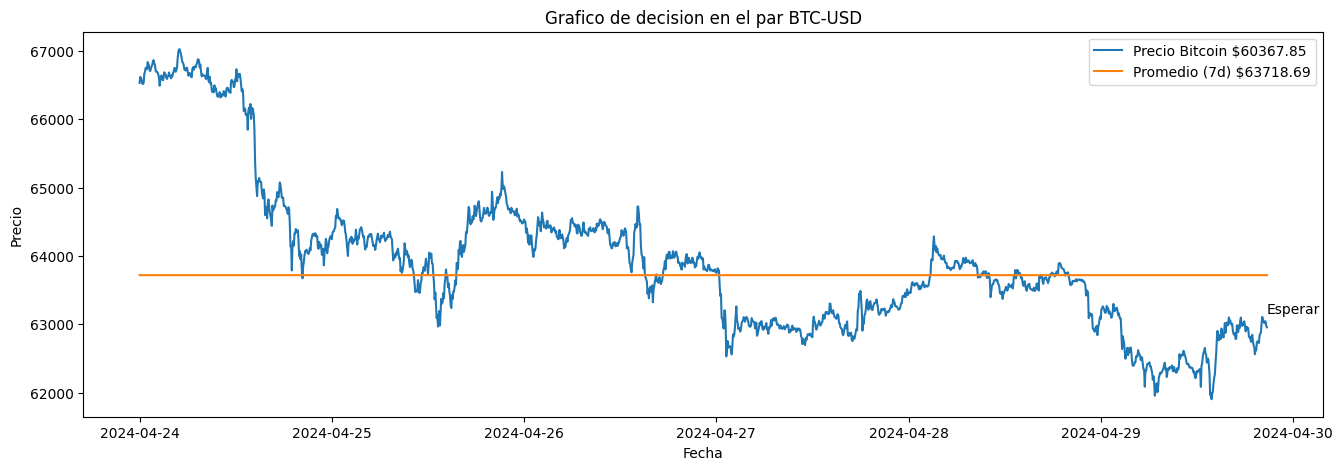

In [15]:
visualizacion()

#**6. Automatización**

El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

*   Importa el método 'clear_output()', este método nos permite borrar los resultados de la pantalla antes de imprimir un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla, impórtalo de la siguiente forma: from IPython.display import clear_output.


*   Importa también la biblioteca ‘time’ de la siguiente forma: import time, utilizaremos su método time.sleep(300) para interrumpir la ejecución del código cada 300 segundos o 5 minutos.


*   Finalmente construiremos un loop infinito para ejecutar permanentemente y en intervalos de 5minutos, las funciones que hemos construído en los pasos 2 al 5 de nuestro proyecto, de la siguiente forma:







In [16]:
from IPython.display import clear_output
import time

[*********************100%%**********************]  1 of 1 completed


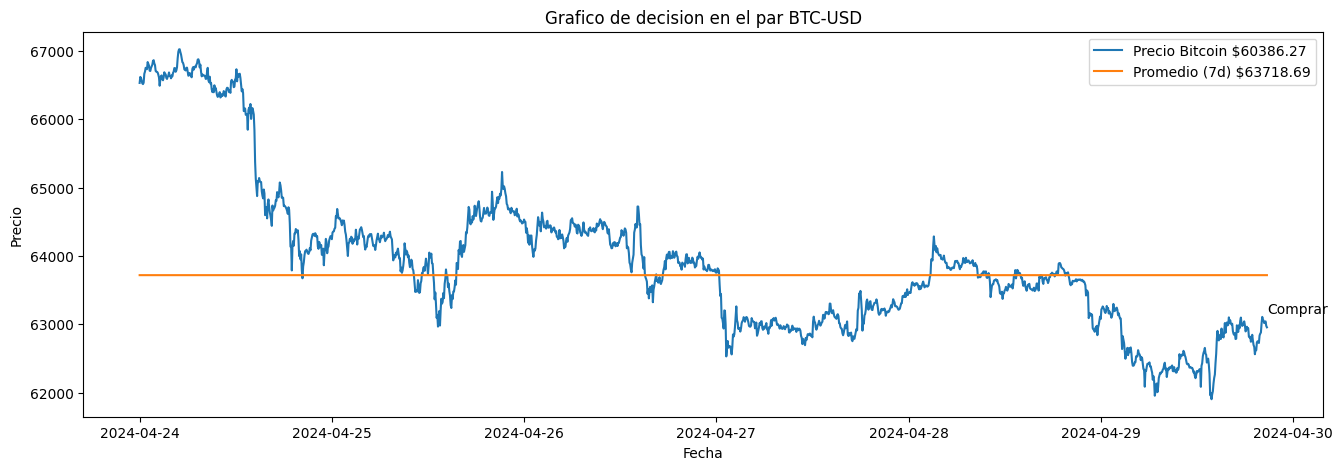

In [ ]:
# Bucle infinito
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)